### 反詐欺檢測
透過SVM 分類異常帳戶與非異常帳戶<br>
分類哪筆資料可能是可疑(詐欺)帳戶<br>
<img src="photo\28POWERPNT_2ujVNy6TSr144731.png" width="80%">

<br>
資料來源<br>
https://www.kaggle.com/code/x09072993/aml-detection/data

In [54]:
# 套件匯入
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

In [55]:
# 设置随机种子
random.seed(50)
print(random.seed(50))
# 导入数据集
dataset = pd.read_csv('./input/PS_20174392719_1491204439457_log.csv')
dataset

None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [56]:
# 初始資料
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [57]:
# 重複資料
print(f"Number of duplicate rows: {dataset.duplicated().sum()}")

Number of duplicate rows: 0


In [58]:
# sns.pairplot(dataset)
# plt.show()

### 資料前處理



In [59]:
# 丟掉無關的特徵
dataset.drop('nameOrig', axis=1, inplace=True)
dataset.drop('nameDest', axis=1, inplace=True)
dataset.drop('isFlaggedFraud', axis=1, inplace=True)
print(dataset)

         step      type      amount  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT     9839.64      170136.00       160296.36   
1           1   PAYMENT     1864.28       21249.00        19384.72   
2           1  TRANSFER      181.00         181.00            0.00   
3           1  CASH_OUT      181.00         181.00            0.00   
4           1   PAYMENT    11668.14       41554.00        29885.86   
...       ...       ...         ...            ...             ...   
6362615   743  CASH_OUT   339682.13      339682.13            0.00   
6362616   743  TRANSFER  6311409.28     6311409.28            0.00   
6362617   743  CASH_OUT  6311409.28     6311409.28            0.00   
6362618   743  TRANSFER   850002.52      850002.52            0.00   
6362619   743  CASH_OUT   850002.52      850002.52            0.00   

         oldbalanceDest  newbalanceDest  isFraud  
0                  0.00            0.00        0  
1                  0.00            0.00        0  
2     

In [60]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [62]:
sample_dataframe = dataset.sample(n=100000)
X = sample_dataframe.iloc[:, :-1].values
y = sample_dataframe.iloc[:, 7].values
print(sample_dataframe.isFraud.value_counts())
X

# print(y.dtypes)

0    99869
1      131
Name: isFraud, dtype: int64


array([[42, 'CASH_OUT', 243997.99, ..., 0.0, 39027.64, 283025.63],
       [261, 'CASH_OUT', 4126.24, ..., 0.0, 0.0, 4126.24],
       [304, 'PAYMENT', 18385.53, ..., 0.0, 0.0, 0.0],
       ...,
       [18, 'PAYMENT', 4620.27, ..., 15657.73, 0.0, 0.0],
       [139, 'CASH_OUT', 36002.32, ..., 56466.27, 366510.42, 402512.74],
       [253, 'PAYMENT', 17334.87, ..., 0.0, 0.0, 0.0]], dtype=object)

In [63]:
# 編碼分類數據
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import scipy.sparse
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
X[:,2]

# sns.set(style="whitegrid")
# ax = sns.boxplot(x = X[:,2], orient = "v", color = "skyblue", width=0.2)  # 畫盒圖
# ax = sns.swarmplot(x = X[:,2], orient = "v", color = "red")   # 加上資料點

# sns.boxplot(x=len(X[:,2]),y=X[:,2])
# plt.show()

# sns.boxplot(x=X[:,1],y=X[:,1])


array([243997.99, 4126.24, 18385.53, ..., 4620.27, 36002.32, 17334.87],
      dtype=object)

In [64]:
# 將數據集拆分為訓練集和測試集

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

counts = np.unique(y_train, return_counts=True)
counts

(array([0, 1], dtype=int64), array([69909,    91], dtype=int64))

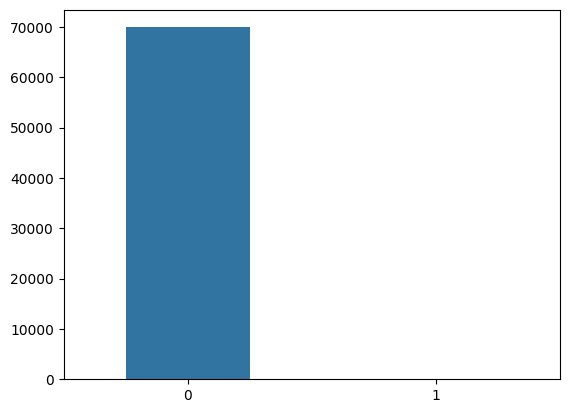

In [65]:
# 未平衡前的抽樣類別比例
sns.barplot(x=counts[0],y=counts[1], width=0.5)
plt.show()

In [66]:
# sns.boxplot(x=X_train,y=X_train)
# plt.show()

In [67]:
# 特徵縮放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)
print(counts)

(array([0, 1], dtype=int64), array([69909,    91], dtype=int64))


### 建構模型

In [68]:
# 將kernel SVM 擬合到訓練集
from sklearn.svm import LinearSVC
from imblearn.under_sampling import NearMiss
from imblearn import over_sampling as os
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import RandomOverSampler

In [69]:
# 應用採樣
# Adaptive Synthetic
ada = ADASYN()
X_resampled, y_resampled = ada.fit_resample(X_train, y_train)
counts = np.unique(y_resampled, return_counts=True)

# 創建管道

pipeline4 = make_pipeline(ADASYN(),LinearSVC(random_state=1))
pipeline4.fit(X_train, y_train)
counts

c:\Users\sam03\anaconda3\envs\DL\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


(array([0, 1], dtype=int64), array([69909, 69909], dtype=int64))

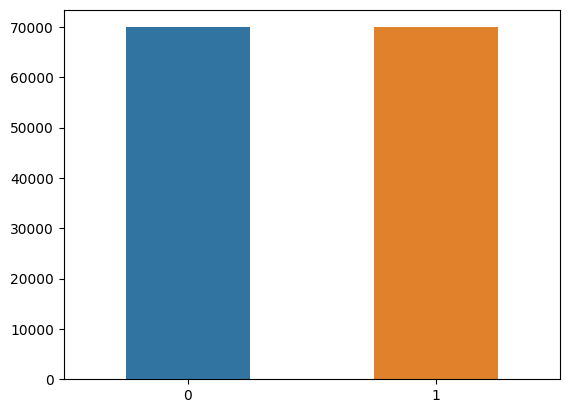

In [70]:
# 平衡後的抽樣類別比例
sns.barplot(x=counts[0],y=counts[1],width=0.5)
plt.show()

### 結果

In [71]:
# 分類並報告結果
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, pipeline4.predict(X_test)))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.97      0.90      0.98      0.93      0.88     14980
          1       0.03      0.90      0.97      0.07      0.93      0.86        20

avg / total       1.00      0.97      0.90      0.98      0.93      0.88     15000



In [72]:
# 製作混淆矩陣
from sklearn.metrics import confusion_matrix, precision_score,auc,roc_auc_score,roc_curve,recall_score
cm = confusion_matrix(y_val, pipeline4.predict(X_val))
roc = roc_auc_score(y_val, pipeline4.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, pipeline4.predict(X_val))
roc_auc = auc(fpr,tpr)

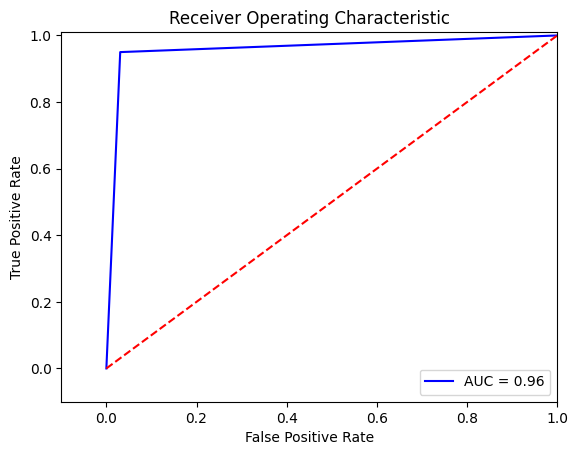

In [73]:
# 绘制 ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
